## KDE(Kernel Density Estimation)의 이해
<h4>seaborn의 distplot()을 이용하여 KDE 시각화</h4>
<url>https://seaborn.pydata.org/tutorial/distributions.html

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


C:\Users\sapb2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

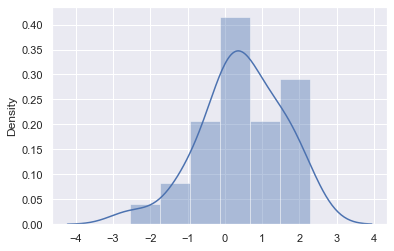

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes = True)

np.random.seed(0)
x = np.random.normal(0,1,size=30)
print(x)
sns.distplot(x)

C:\Users\sapb2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sapb2\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

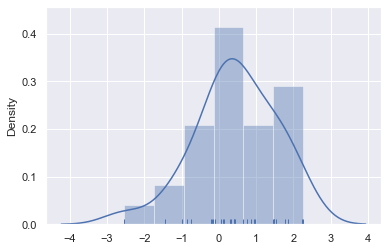

In [2]:
sns.distplot(x,rug=True)

C:\Users\sapb2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sapb2\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

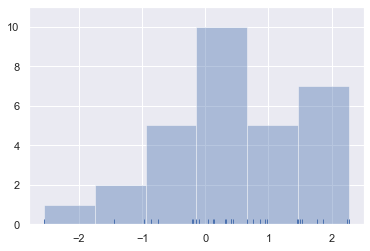

In [3]:
sns.distplot(x,kde=False, rug=True)

C:\Users\sapb2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sapb2\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

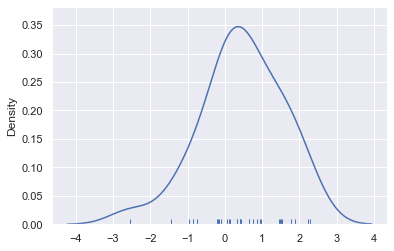

In [5]:
sns.distplot(x, hist=False, rug=True)

<h4> 개별 관측데이터에 대해 가우시안 커널 함수를 적용

<AxesSubplot:>

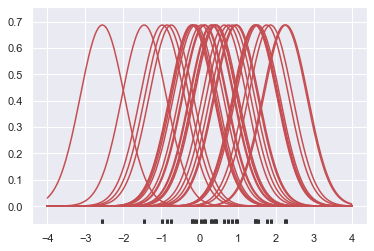

In [12]:
from scipy import stats

bandwidth = 1.06*x.std() * x.size ** (-1/5.)
# np.linspace 배열 생성
support = np.linspace(-4,4,200)

kernels = []
# norm 크기(노름)
for x_i in x :
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
    
sns.rugplot(x,color=".2", linewidth=3)

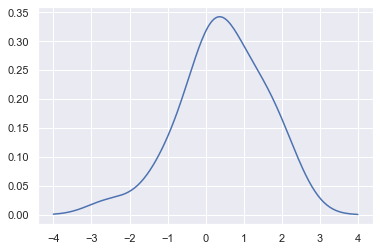

In [13]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
# trapz 적분
density /= trapz(density, support)
plt.plot(support, density)

<h4> seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음

<AxesSubplot:ylabel='Density'>

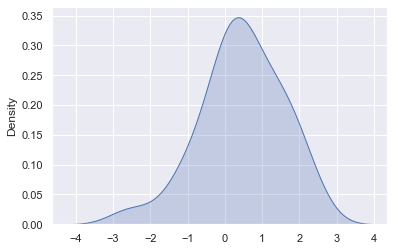

In [14]:
sns.kdeplot(x, shade=True)

<h4> bandwidth에 따른 KDE 변화

C:\Users\sapb2\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\sapb2\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


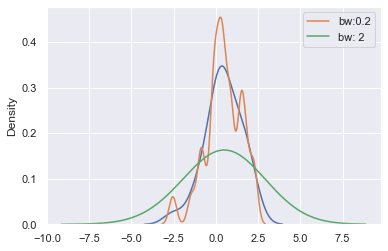

In [16]:
sns.kdeplot(x)
sns.kdeplot(x,bw=.2, label = "bw:0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

## 사이킷런을 이용한 Mean Shift

<p> make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행

In [17]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

x,y = make_blobs(n_samples = 200, n_features = 2, centers = 3,
                cluster_std = 0.8, random_state = 0)

meanshift = MeanShift(bandwidth = 0.9)
cluster_labels = meanshift.fit_predict(x)
print("cluster labels 유형 : ",np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2 3 4 5 6 7]


In [32]:
# features 2개는 x에, center 3개로 중심점은 y로
pd.DataFrame(x).head(10)

0         1
0 -1.692427  3.622025
1  0.697940  4.428867
2  1.100228  4.606317
3 -1.448724  3.384245
4  1.214861  5.364896
5 -0.908302  1.970778
6  2.472119  0.437033
7  1.656842  2.441289
8  1.077800  4.625379
9 -1.679427  2.602003

In [33]:
pd.DataFrame(y).head(10)

0
0  2
1  0
2  0
3  2
4  0
5  2
6  1
7  1
8  0
9  2

<h4> 커널함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행

In [18]:
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(x)
print("cluster labels 유형 : ",np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


<h4> 최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행

In [21]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(x,quantile = 0.25)
print("bandwidth 값 : ",round(bandwidth,3))

meanshift = MeanShift(bandwidth=1.689)
cluster_labels = meanshift.fit_predict(x)
print("cluster labels 유형 : ",np.unique(cluster_labels))

bandwidth 값 :  1.689
cluster labels 유형 :  [0 1 2]


In [23]:
import pandas as pd

clusterDF = pd.DataFrame(data = x, columns = ['ftr1','ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(x,quantile=0.25)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(x)
print("cluster labels 유형 : ",np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


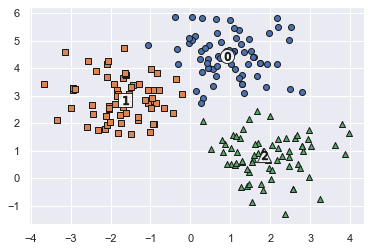

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels : 
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
               edgecolor='k', alpha = 0.9, marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
               marker ='$%d$' % label)

plt.show()

In [26]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64


In [ ]:
#meanshift 단점 : bandwidth에 매우 민감
#--> 영상데이터에 많이 이용됨